In [1]:
%pylab inline
from cpymad.madx import Madx

Populating the interactive namespace from numpy and matplotlib


In [2]:
import matplotlib.patches as patches

def plotLatticeSeries(ax,series, height=1., v_offset=0., color='r',alpha=0.5):
    aux=series
    ax.add_patch(
    patches.Rectangle(
        (aux.s-aux.l, v_offset-height/2.),   # (x,y)
        aux.l,          # width
        height,          # height
        color=color, alpha=alpha
    )
    )
    return;

# Parameters

In [3]:
c = 2000          # m, circumference
ncells = 40       # number of cells
lcell = c/ncells # m, length of cell 
lq = 3.0          # m, length of main quads (both focusing and defocusing)
ld = 5.0          # m, length of main dipoles 
f = 1.5*lcell      # m, focusing length
k1 = 1/f          # 1/m, focusing strength for main quads
k2 = -1/f          # 1/m, focusing strength for main quads

# Triplet
lq3 = 3.0          # m, length of triplets
k1q3 = 0.030303030  # 1/m, focusing strength of tripplets
k2q3 = -0.030303030 # 1/m, focusing strength of tripplets

# Matching quads left of the IPs
lqm = 3.0          # m, matching quads
k1m = 0         # 1/m, focusing strength of matching quads
k2m = 0         # 1/m, focusing strength of matching quads
k3m = 0         # 1/m, focusing strength of matching quads
k4m = 0         # 1/m, focusing strength of matching quads
k5m = 0         # 1/m, focusing strength of matching quads

# Matching quads right of the IPs
lqm = 3.0          # m, matching quads
k6m = 0         # 1/m, focusing strength of matching quads
k7m = 0         # 1/m, focusing strength of matching quads
k8m = 0         # 1/m, focusing strength of matching quads
k9m = 0         # 1/m, focusing strength of matching quads
k10m = 0         # 1/m, focusing strength of matching quads

# Sextupoles
ks1 = 0
ks2 = 0


# Flags
flat_optics = True
if flat_optics:
    betaxstar = 0.7
    betaystar = 0.7
else:
    betaxstar = 0.4
    betaystar = 1.0
    
thick_dipoles = False
if thick_dipoles:
    dipoleclass = 'DIPOL    : SBEND       , L:=ld, ANGLE:= angle;'
else:
    dipoleclass = 'DIPOL    : multipole, knl:= {angle};'

# Lattice

In [4]:
par = f'''
        c = {c};
        ncells = {ncells};
        lcell = {lcell};
        lq = {lq};
        ld = {ld};
        f = {f};
        k1 = {k1};
        k2 = {k2};
        lq3 = {lq3};
        k1q3 = {k1q3};
        k2q3 = {k2q3};
        lqm = {lqm};
        k1m = {k1m};
        k2m = {k2m};
        k3m = {k3m};
        k4m = {k4m};
        k5m = {k5m};
        k6m = {k6m};
        k7m = {k7m};
        k8m = {k8m};
        k9m = {k9m};
        k10m = {k10m};
        ks1 = {ks1};
        ks2 = {ks2};
'''

ele = f'''
        {dipoleclass}
        
        ! Main focusing quads
        QF       : QUADRUPOLE  , K1:=k1, L:=lq;          ! main focusing quadrupoles
        QD       : QUADRUPOLE  , K1:=k2, L:=lq;          ! main defocusing quadrupoles
        !QF       : MULTIPOLE  , knl:={0,k1};
        !QD       : MULTIPOLE  , knl:={0,k2};
        
        ! Tripplets
        QFT      : QUADRUPOLE  , K1:=k1q3, L:=lq3;       ! main triplet focusing quadrupoles
        QDT      : QUADRUPOLE  , K1:=k2q3, L:=lq3;       ! main triplet defocusing quadrupoles
        
        ! Matching quads left of the IPs
        QM1      : QUADRUPOLE  , K1:=k1m, L:=lqm;        
        QM2      : QUADRUPOLE  , K1:=k2m, L:=lqm;        
        QM3      : QUADRUPOLE  , K1:=k3m, L:=lqm;        
        QM4      : QUADRUPOLE  , K1:=k4m, L:=lqm;        
        QM5      : QUADRUPOLE  , K1:=k5m, L:=lqm;        
        QM6      : QUADRUPOLE  , K1:=k6m, L:=lqm;        
        QM7      : QUADRUPOLE  , K1:=k7m, L:=lqm;        
        QM8      : QUADRUPOLE  , K1:=k8m, L:=lqm;        
        QM9      : QUADRUPOLE  , K1:=k9m, L:=lqm;        
        QM10     : QUADRUPOLE  , K1:=k10m, L:=lqm;        
        mymarker: marker;
'''
ele += '''
        ! Sextupoles
        !SEXT1    : SEXTUPOLE   , K2:=KS1, L:=0.1;
        !SEXT2    : SEXTUPOLE   , K2:=KS2, L:=0.1;
        SEXT1    : MULTIPOLE   , Knl:={0,0,KS1};
        SEXT2    : MULTIPOLE   , Knl:={0,0,KS2};
'''

# Main ring
seq = '''
        ring: SEQUENCE, refer=centre, L=c;
'''
for i in range(ncells):
    #if i in [0,2,ncells/2-3,ncells/2-1, ncells/2, ncells/2+2, ncells-3, ncells-1]:
    if i==100:
        seq += f'''
        qf{i}: qf, at = {i}*lcell+lq/2;
        xno{i}1: sext1, at = lcell*{i}+ lcell*0.1;
        qd{i}: qd, at = {i}*lcell+lcell*0.5+lq/2;
        xno{i}2: sext2, at = lcell*{i}+ lcell*0.6;
        \n'''
    else:
        seq += f'''
        qf{i}: qf, at = lcell*{i}+lq;
        xno{i}1: sext1, at = lcell*{i}+ lcell*0.1;
        sb{i}1: DIPOL, at = lcell*{i} + lcell*0.2+ld/2;
        sb{i}2: DIPOL, at = lcell*{i} + lcell*0.35+ld/2;
        qd{i}: qd, at = lcell*{i}+lcell*0.5+lq/2;
        xno{i}2: sext2, at = lcell*{i}+ lcell*0.6;
        sb{i}3: DIPOL, at = lcell*{i} + lcell*0.65+ld/2;
        sb{i}4: DIPOL, at = lcell*{i} + lcell*0.8+ld/2;
        \n'''
seq += '''
        endsequence;
'''

beam = '''
        beam, particle=proton, energy=20.0;
'''

In [5]:
madinput = f'''
        {par}
        {ele}
        {seq}
        {beam}
        angle = twopi/(4*ncells);
        use, sequence=ring;
'''

In [6]:
#mad = Madx(stdout=False)
mad = Madx()


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.08.01  (64 bit, Linux)       +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2022.02.25               +
  + Execution date: 2022.11.15 16:02:32      +
  ++++++++++++++++++++++++++++++++++++++++++++


In [7]:
mad.input(madinput)

True

# A simple match

In [8]:
phi_cell= 60
tuneH = phi_cell*np.pi/180*ncells/2/np.pi
tuneV = phi_cell*np.pi/180*ncells/2/np.pi

In [9]:
mad.input(f'''
        MATCH, Sequence=ring;
            VARY, NAME = k1, STEP = 1e-4;
            VARY, NAME = k2, STEP = 1e-4;
            GLOBAL, Q1 = {tuneH};
            GLOBAL, Q2 = {tuneV};
            JACOBIAN,CALLS=1000,TOLERANCE=1.0E-18,STRATEGY=3;
        ENDMATCH;
''')

START MATCHING

number of sequences: 1
sequence name: ring
number of variables:    2
user given constraints: 1
total constraints:      2

START JACOBIAN:

 JACOBIAN Strategy =           3
Initial Penalty Function =   0.1950757907140467E+02


 Solve system with            2 con,           2 var
 Rank             2   Condition number    2.1634112122290343     
 Step length    4.3067379695767058E-002
call:     2 Dx =   0.43067380E-01  Penalty function =  0.9205711278546262E-03
 Solve system with            2 con,           2 var
 Rank             2   Condition number    2.0685612715468311     
 Step length    2.9186961090852260E-004
call:     3 Dx =   0.29186961E-03  Penalty function =  0.2661392086250036E-11
 Solve system with            2 con,           2 var
 Rank             2   Condition number    2.0691766380325003     
 Step length    1.4537750210103231E-008
call:     4 Dx =   0.14537750E-07  Penalty function =  0.1204238849194847E-20
 ++++++++++ JACOBIAN ended: converged successfu

True

In [10]:
mad.input('twiss;')
twtable = mad.table.twiss
myTwiss = twtable.dframe()

enter Twiss module
  
iteration:   1 error:   0.000000E+00 deltap:   0.000000E+00
orbit:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

            length             orbit5               alfa            gammatr 
              2000                 -0        0.022426668        6.677557295 

                q1                dq1            betxmax              dxmax 
       6.666666667       -7.357987605        83.26176079        9.448518241 

             dxrms             xcomax             xcorms                 q2 
        7.52602355                  0                  0        6.666666667 

               dq2            betymax              dymax              dyrms 
      -7.357987605        83.26176079                  0                  0 

            ycomax             ycorms             deltap            synch_1 
                 0                  0                  0                  0 

           synch_2            

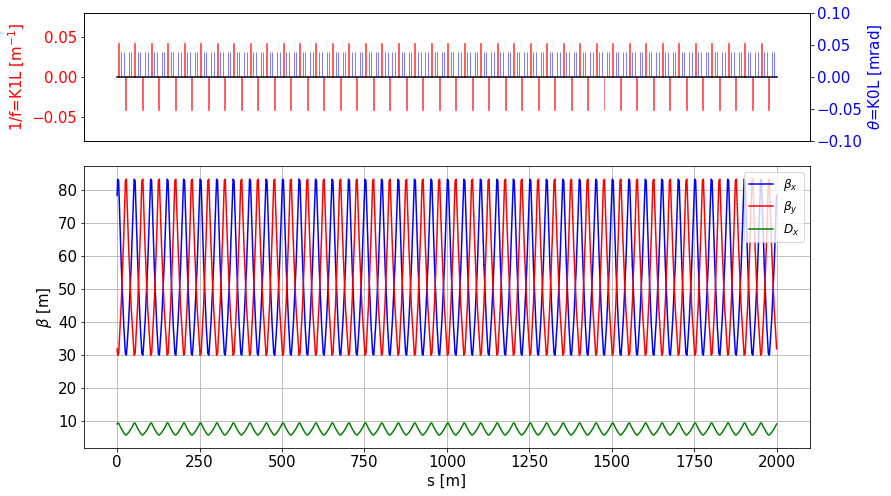

In [11]:
fig = plt.figure(figsize=(13,8))
fontsize=15

ax1=plt.subplot2grid((3,3), (0,0), colspan=3, rowspan=1)
plt.plot(myTwiss['s'],0*myTwiss['s'],'k')
DF=myTwiss[(myTwiss['keyword']=='quadrupole')]
#DF=myTwiss[(myTwiss['keyword']=='multipole')]
for i in range(len(DF)):
    aux=DF.iloc[i]
    plotLatticeSeries(plt.gca(),aux, height=aux.k1l, v_offset=aux.k1l/2, color='r')
color = 'red'
ax1.set_ylabel('1/f=K1L [m$^{-1}$]', color=color,fontsize=fontsize)  # we already handled the x-label with ax1
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', bottom=False,labelbottom=False)
ax1.tick_params(labelsize=fontsize)
#plt.grid()
plt.ylim(-.08,.08)
#plt.title('Our machine, 2016 Optics, Beam 1, IP5 squeeze, $\\beta_{IP}=$'+format(myTwiss[myTwiss['name'].str.contains('ip5')]['betx'].values[0],'2.2f')+' m, Q=('+format(madx.table.summ.Q1[0],'2.3f')+', '+ format(madx.table.summ.Q2[0],'2.3f')+'), $\\xi$=('+format(madx.table.summ.DQ1[0],'2.3f')+', '+ format(madx.table.summ.DQ2[0],'2.3f')+')')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'blue'
ax2.set_ylabel('$\\theta$=K0L [mrad]', color=color,fontsize=fontsize)  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor=color)
ax2.tick_params(labelsize=fontsize)
DF=myTwiss[(myTwiss['keyword']=='multipole')]
if thick_dipoles:
    DF=myTwiss[(myTwiss['keyword']=='sbend')]
for i in range(len(DF)):
    aux=DF.iloc[i]
    plotLatticeSeries(ax2,aux, height=aux.angle, v_offset=aux.angle/2, color='b')
    plotLatticeSeries(ax2,aux, height=aux.k0l, v_offset=aux.k0l/2, color='b')
plt.ylim(-.1,.1)

plt.subplot2grid((3,3), (1,0), colspan=3, rowspan=2,sharex=ax1)

plot(myTwiss.s,myTwiss.betx,'-b',label='$\\beta_x$')
plot(myTwiss.s,myTwiss.bety,'-r',label='$\\beta_y$')
plot(myTwiss.s,myTwiss.dx,'-g',label='$D_x$')
xlabel('s [m]',fontsize=fontsize)
ylabel('$\\beta$ [m]',fontsize=fontsize)
xticks(fontsize=fontsize)
yticks(fontsize=fontsize)
grid()
legend(fontsize=fontsize-3,loc='upper right')


In [12]:
# check phase advance
print('phase advance per cell in x and y')
print(mad.table.summ.q1*2*np.pi/ncells*180/np.pi)
print(mad.table.summ.q2*2*np.pi/ncells*180/np.pi)

phase advance per cell in x and y
[60.]
[60.]


# Add dispersion suppresor

In [13]:
# Remove dipoles (m=1, n=1 scheme for 60 degrees phase advance)
seqedit = '''
        Seqedit, sequence=ring;
        flatten;
'''
for i in range(ncells):
    if i in [ncells-6, ncells-4,ncells-3,ncells-2,ncells-1,0,1,2,3, 5, 
             ncells/2-6, ncells/2-4,ncells/2-3,ncells/2-2,ncells/2-1,ncells/2,ncells/2+1,ncells/2+2,ncells/2+3, ncells/2+5]:
        for j in range(4):
            seqedit+= f'''remove, element=sb{i}{j+1};\n'''
            
seqedit += '''flatten; 
              endedit;'''

In [14]:
mad.input('use, sequence=ring;')

mad.input(f'''
{seqedit}
angle = twopi/(4*ncells - 4*(4+1)*2*2);
''')
mad.input('use, sequence=ring;')

++++++ info: seqedit - number of elements installed:  0
++++++ info: seqedit - number of elements moved:      0
++++++ info: seqedit - number of elements removed:    80
++++++ info: seqedit - number of elements replaced:   0
++++++ info: angle redefined


True

In [15]:
# Rematching is not needed if bends are thin
if thick_dipoles:
    mad.input(f'''
            MATCH, Sequence=ring;
                VARY, NAME = k1, STEP = 1e-4;
                VARY, NAME = k2, STEP = 1e-4;
                GLOBAL, Q1 = {tuneH};
                GLOBAL, Q2 = {tuneV};
                JACOBIAN,CALLS=1000,TOLERANCE=1.0E-18,STRATEGY=3;
            ENDMATCH;
    ''')

In [16]:
mad.input('use, sequence=ring;')
mad.input('twiss;')
twtable = mad.table.twiss
myTwiss = twtable.dframe()

enter Twiss module
  
iteration:   1 error:   0.000000E+00 deltap:   0.000000E+00
orbit:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

            length             orbit5               alfa            gammatr 
              2000                 -0      0.03744016785        5.168102356 

                q1                dq1            betxmax              dxmax 
       6.666666667       -7.357987605        83.26176079        18.89703648 

             dxrms             xcomax             xcorms                 q2 
       11.52307724                  0                  0        6.666666667 

               dq2            betymax              dymax              dyrms 
      -7.357987605        83.26176079                  0                  0 

            ycomax             ycorms             deltap            synch_1 
                 0                  0                  0                  0 

           synch_2            

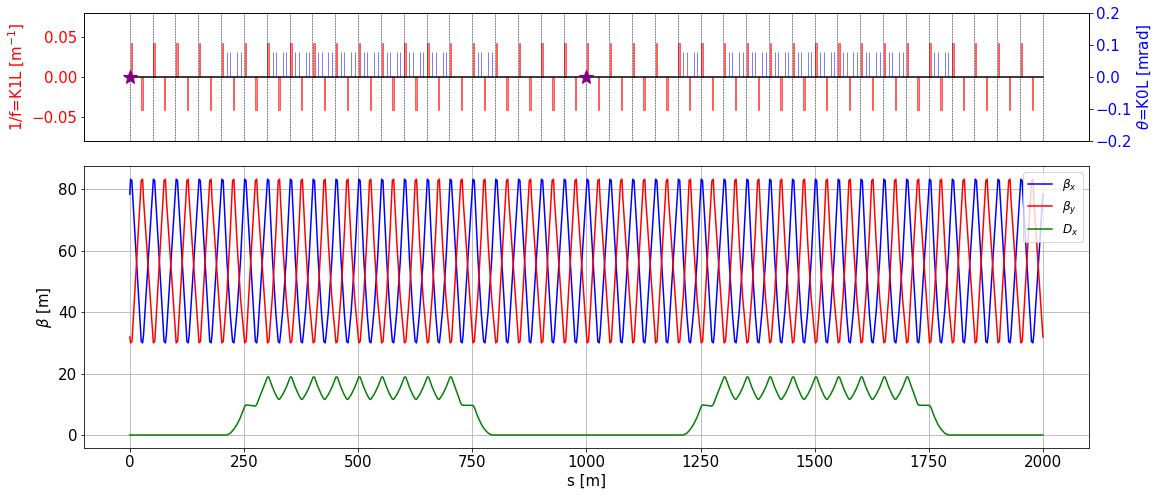

In [17]:
fig = plt.figure(figsize=(18,8))
fontsize=15

ax1=plt.subplot2grid((3,3), (0,0), colspan=3, rowspan=1)
plt.plot(myTwiss['s'],0*myTwiss['s'],'k')
for i in range(41):
    ax1.axvline((i)*50,c='black',lw=0.5,ls='--')
DF=myTwiss[(myTwiss['keyword']=='quadrupole')]
#DF=myTwiss[(myTwiss['keyword']=='multipole')]
for i in range(len(DF)):
    aux=DF.iloc[i]
    plotLatticeSeries(plt.gca(),aux, height=aux.k1l, v_offset=aux.k1l/2, color='r')
color = 'red'
ax1.set_ylabel('1/f=K1L [m$^{-1}$]', color=color,fontsize=fontsize)  # we already handled the x-label with ax1
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', bottom=False,labelbottom=False)
ax1.tick_params(labelsize=fontsize)
ax1.plot(0,0,'*',c='purple',ms=15)
ax1.plot(c/2,0,'*',c='purple',ms=15)
plt.ylim(-.08,.08)
#plt.title('Our machine, 2016 Optics, Beam 1, IP5 squeeze, $\\beta_{IP}=$'+format(myTwiss[myTwiss['name'].str.contains('ip5')]['betx'].values[0],'2.2f')+' m, Q=('+format(madx.table.summ.Q1[0],'2.3f')+', '+ format(madx.table.summ.Q2[0],'2.3f')+'), $\\xi$=('+format(madx.table.summ.DQ1[0],'2.3f')+', '+ format(madx.table.summ.DQ2[0],'2.3f')+')')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'blue'
ax2.set_ylabel('$\\theta$=K0L [mrad]', color=color,fontsize=fontsize)  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor=color)
ax2.tick_params(labelsize=fontsize)
DF=myTwiss[(myTwiss['keyword']=='multipole')]
if thick_dipoles:
    DF=myTwiss[(myTwiss['keyword']=='sbend')]
for i in range(len(DF)):
    aux=DF.iloc[i]
    plotLatticeSeries(ax2,aux, height=aux.angle, v_offset=aux.angle/2, color='b')
    plotLatticeSeries(ax2,aux, height=aux.k0l, v_offset=aux.k0l/2, color='b')
plt.ylim(-.2,.2)

plt.subplot2grid((3,3), (1,0), colspan=3, rowspan=2,sharex=ax1)

plot(myTwiss.s,myTwiss.betx,'-b',label='$\\beta_x$')
plot(myTwiss.s,myTwiss.bety,'-r',label='$\\beta_y$')
#plot(myTwiss.s,myTwiss.alfx*10,'--b')
#plot(myTwiss.s,myTwiss.alfy*10,'--r')
plot(myTwiss.s,myTwiss.dx,'-g',label='$D_x$')
xlabel('s [m]',fontsize=fontsize)
ylabel('$\\beta$ [m]',fontsize=fontsize)
xticks(fontsize=fontsize)
yticks(fontsize=fontsize)
grid()
legend(fontsize=fontsize-3,loc='upper right')


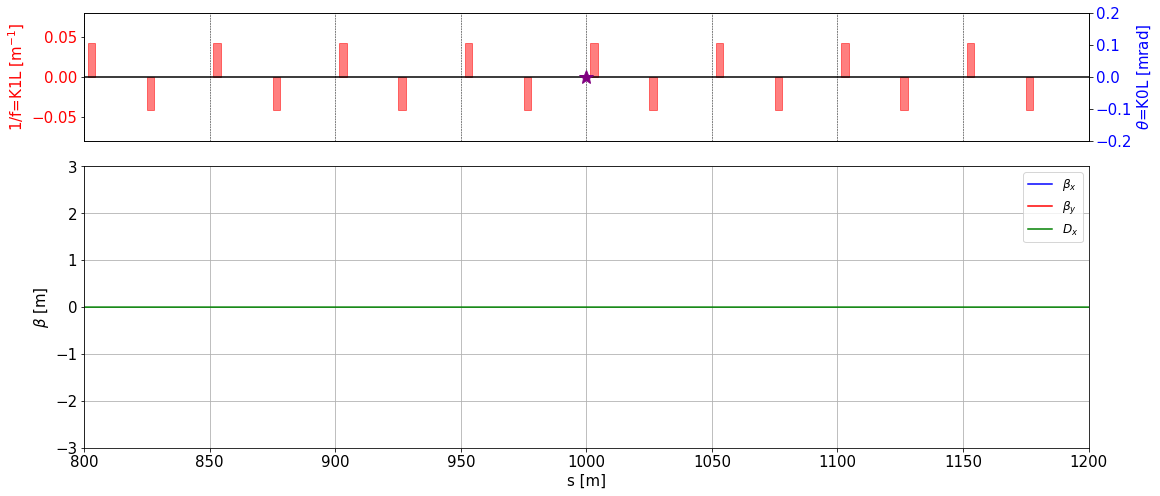

In [18]:
fig.gca().set_xlim(16*lcell,24*lcell)
fig.gca().set_ylim(-3,3)
display(fig)

In [19]:
# Optics at the entrance of the cell (left of the IP)
print(myTwiss.betx[0])
print(myTwiss.alfx[0])
print(myTwiss.bety[0])
print(myTwiss.alfy[0])
betxtargetleft = myTwiss.betx[0]
alfxtargetleft = myTwiss.alfx[0]
betytargetleft = myTwiss.bety[0]
alfytargetleft = myTwiss.alfy[0]

78.36466208392963
-1.5983454030185102
31.895506879168607
0.6684426557485279


In [20]:
# Optics at the end of the cell (right of the IP)
print(myTwiss.betx[-1])
print(myTwiss.alfx[-1])
print(myTwiss.bety[-1])
print(myTwiss.alfy[-1])
betxtargetright = myTwiss.betx[-1]
alfxtargetright = myTwiss.alfx[-1]
betytargetright = myTwiss.bety[-1]
alfytargetright = myTwiss.alfy[-1]

78.36466208392984
-1.5983454030185178
31.89550687916859
0.6684426557485268


In [21]:
# Get strengths of main quads
mad.input('value, k1;')
mad.input('value, k2;')
k1 = mad.globals.k1
k2 = mad.globals.k2

k1                 =      0.01392934299 ;
k2                 =     -0.01392934299 ;


In [22]:
# check phase advance
print('phase advance per cell in x and y')
print(mad.table.summ.q1*2*np.pi/ncells*180/np.pi)
print(mad.table.summ.q2*2*np.pi/ncells*180/np.pi)

phase advance per cell in x and y
[60.]
[60.]


# IP left

In [23]:
# straight section left of the IP
seq2 = '''
        ss: SEQUENCE, refer=centre, L=4*lcell;
        
        ! matching quads
        n = 0;
        QM11: qm1, at = lcell*n+lcell*0.25+lqm/2;
        QM12: qm2, at = lcell*n+lcell*0.75+lqm/2;
        
        ! matching quads
        n = 1; 
        QM13: qm3, at = lcell*n+lcell*0.25+lqm/2;
        
        n = 2; !empty
        QM14: qm4, at = lcell*n+lcell*0+lqm/2;
        QM15: qm5, at = lcell*n+lcell*0.75+lqm/2;
        
        ! Triplet
        n = 3;  
        QFT11: qft, at = lcell*n+16.66666666666;
        QDT11: qdt, at = lcell*n+25;
        QDT12: qdt, at = lcell*n+33.33333333333;
        QFT12: qft, at = lcell*n+41.66666666666;
        
        endsequence;
'''

beam2 = '''
        beam, particle=proton, energy=20.0;
'''

In [24]:
madinput = f'''
        {seq2}
        {beam2}
        use, sequence=ss;
        
'''
mad.input(madinput)

++++++ info: n redefined
++++++ info: n redefined
++++++ info: n redefined


True

In [25]:
# Some initial parameters
mad.input(f'''
k1m = -0.02012455257;
k2m = 0.02286888419;
k3m = -0.01958231945;
k4m = 0.01119300171;
k5m = -0.02108338403;
''')


++++++ info: k1m redefined
++++++ info: k2m redefined
++++++ info: k3m redefined
++++++ info: k4m redefined
++++++ info: k5m redefined


True

In [26]:
# match beginning of the lattice
mad.input('SAVEBETA, LABEL=bini, PLACE=#s;')
mad.input(f'twiss, betx={betxtargetleft},bety={betytargetleft},alfx={alfxtargetleft},alfy={alfytargetleft};')

enter Twiss module
  
open line - error with deltap:   0.000000E+00
initial orbit vector:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00
final orbit vector:     0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

            length             orbit5               alfa            gammatr 
               200                 -0                  0                  0 

                q1                dq1            betxmax              dxmax 
      0.5305782424                  0        9206.520123                  0 

             dxrms             xcomax             xcorms                 q2 
                 0                  0                  0        1.454567333 

               dq2            betymax              dymax              dyrms 
                 0        541.4477505                  0                  0 

            ycomax             ycorms             deltap            synch_1 


True

In [27]:
# match end of the lattice (IP)
mad.input(f'''
MATCH, SEQUENCE=ss, beta0=bini;
VARY, NAME = k1m, STEP = 1e-4;
VARY, NAME = k2m, STEP = 1e-4;
VARY, NAME = k3m, STEP = 1e-4;
VARY, NAME = k4m, STEP = 1e-4;
VARY, NAME = k5m, STEP = 1e-4;
constraint,sequence=ss,range=#s/#e,betx<2000;
constraint,sequence=ss,range=#s/#e,bety<2000;
constraint,sequence=ss,range=#e,betx={betaxstar},bety={betaystar},alfx=0,alfy=0;
jacobian,calls=5000,tolerance=1.e-10;
endmatch;
''')

START MATCHING

number of sequences: 1
sequence name: ss
number of beta0s: 1
BETA0 name: bini
number of variables:    5
user given constraints: 4
total constraints:      44

START JACOBIAN:

 JACOBIAN Strategy =           3
Initial Penalty Function =   0.8955143437257755E+08


 Solve system with            9 con,           5 var
 Rank             5   Condition number    4430.9206993969228     
 Step length   0.57348305094929752     
 Bisec iteration            1
call:     2 Dx =   0.74501277E+00  Penalty function =  0.4583286076543323E+08
 Solve system with           15 con,           5 var
 Rank             5   Condition number    37.571347547481935     
 Step length   0.18783075708705427     
call:     3 Dx =   0.18783076E+00  Penalty function =  0.2514177233361278E+07
 Solve system with           11 con,           5 var
 Rank             5   Condition number    25.363175932678701     
 Step length    1.4086105007651773E-002
call:     4 Dx =   0.14086105E-01  Penalty function =  0.89

True

In [28]:
mad.input('twiss, beta0=bini;')
twtable=mad.table.twiss
myTwiss = twtable.dframe()

enter Twiss module
 Found 6 initial orbit vector values from twiss command. 
  
open line - error with deltap:   0.000000E+00
initial orbit vector:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00
final orbit vector:     0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

            length             orbit5               alfa            gammatr 
               200                 -0                  0                  0 

                q1                dq1            betxmax              dxmax 
      0.7849432451                  0        2000.000254                  0 

             dxrms             xcomax             xcorms                 q2 
                 0                  0                  0        1.241837926 

               dq2            betymax              dymax              dyrms 
                 0        1999.946177                  0                  0 

            ycomax 

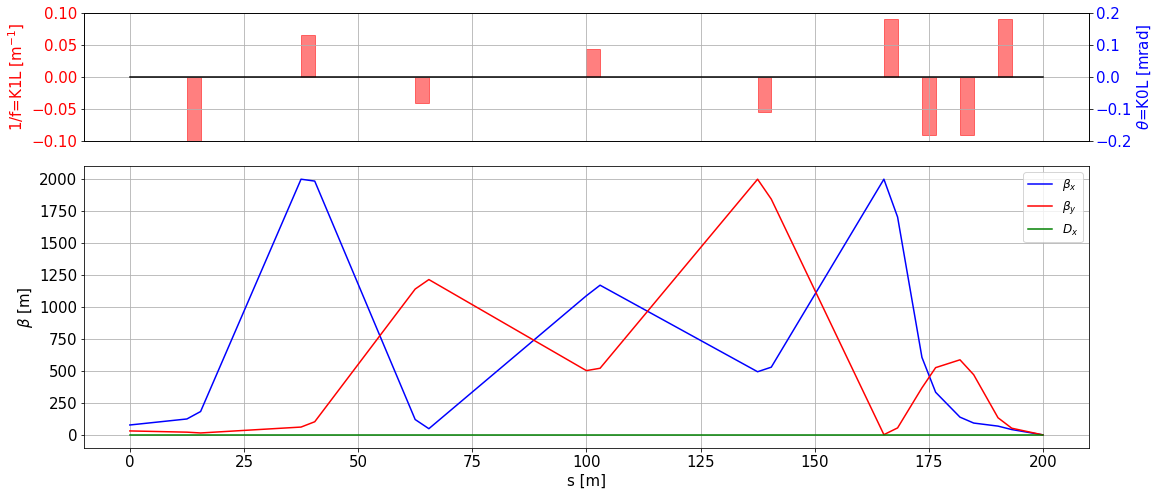

In [29]:
fig = plt.figure(figsize=(18,8))
fontsize=15

ax1=plt.subplot2grid((3,3), (0,0), colspan=3, rowspan=1)
plt.plot(myTwiss['s'],0*myTwiss['s'],'k')
DF=myTwiss[(myTwiss['keyword']=='quadrupole')]
#DF=myTwiss[(myTwiss['keyword']=='multipole')]
for i in range(len(DF)):
    aux=DF.iloc[i]
    plotLatticeSeries(plt.gca(),aux, height=aux.k1l, v_offset=aux.k1l/2, color='r')
color = 'red'
ax1.set_ylabel('1/f=K1L [m$^{-1}$]', color=color,fontsize=fontsize)  # we already handled the x-label with ax1
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', bottom=False,labelbottom=False)
ax1.tick_params(labelsize=fontsize)
plt.ylim(-.1,.1)
plt.grid(True)
#plt.title('Our machine, 2016 Optics, Beam 1, IP5 squeeze, $\\beta_{IP}=$'+format(myTwiss[myTwiss['name'].str.contains('ip5')]['betx'].values[0],'2.2f')+' m, Q=('+format(madx.table.summ.Q1[0],'2.3f')+', '+ format(madx.table.summ.Q2[0],'2.3f')+'), $\\xi$=('+format(madx.table.summ.DQ1[0],'2.3f')+', '+ format(madx.table.summ.DQ2[0],'2.3f')+')')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'blue'
ax2.set_ylabel('$\\theta$=K0L [mrad]', color=color,fontsize=fontsize)  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor=color)
ax2.tick_params(labelsize=fontsize)
#DF=myTwiss[(myTwiss['keyword']=='sbend')]
DF=myTwiss[(myTwiss['keyword']=='multipole')]
for i in range(len(DF)):
    aux=DF.iloc[i]
    plotLatticeSeries(ax2,aux, height=aux.angle, v_offset=aux.angle/2, color='b')
    plotLatticeSeries(ax2,aux, height=aux.k0l, v_offset=aux.k0l/2, color='b')
plt.ylim(-.2,.2)

plt.subplot2grid((3,3), (1,0), colspan=3, rowspan=2,sharex=ax1)

plot(myTwiss.s,myTwiss.betx,'-b',label='$\\beta_x$')
plot(myTwiss.s,myTwiss.bety,'-r',label='$\\beta_y$')
plot(myTwiss.s,myTwiss.dx,'-g',label='$D_x$')
xlabel('s [m]',fontsize=fontsize)
ylabel('$\\beta$ [m]',fontsize=fontsize)
xticks(fontsize=fontsize)
yticks(fontsize=fontsize)
grid()
legend(fontsize=fontsize-3,loc='upper right')


In [30]:
# Get global strengths of matching quads
mad.input('value,k1m;')
mad.input('value,k2m;')
mad.input('value,k3m;')
mad.input('value,k4m;')
mad.input('value,k5m;')
k1m = mad.globals.k1m
k2m = mad.globals.k2m
k3m = mad.globals.k3m
k4m = mad.globals.k4m
k5m = mad.globals.k5m

k1m                =     -0.03369527975 ;
k2m                =      0.02161873572 ;
k3m                =     -0.01378749731 ;
k4m                =      0.01477001658 ;
k5m                =        -0.01828602 ;


In [31]:
# Confirm that the optics at the entrance are correct
print(myTwiss.betx[0]-betxtargetleft)
print(myTwiss.alfx[0]-alfxtargetleft)
print(myTwiss.bety[0]-betytargetleft)
print(myTwiss.alfy[0]-alfytargetleft)

0.0
0.0
0.0
0.0


# IP right

In [32]:
# straight section left of the IP
seq2 = '''
        ss2: SEQUENCE, refer=centre, L=4*lcell;
        
        ! Triplet
        n = 0;
        ! Antisymmetric
        !QDT22: qdt, at = lcell*n+50-41.66666666666;
        !QFT22: qft, at = lcell*n+50-33.33333333333;
        !QFT21: qft, at = lcell*n+50-25;
        !QDT21: qdt, at = lcell*n+50-16.66666666666;
        ! Symmetric
        QFT22: qft, at = lcell*n+50-41.66666666666;
        QDT22: qdt, at = lcell*n+50-33.33333333333;
        QDT21: qdt, at = lcell*n+50-25;
        QFT21: qft, at = lcell*n+50-16.66666666666;
        
        
        ! matching quads
        n = 1;
        QM16: qm6, at = lcell*n+lcell*(1-0.75)-lqm/2;
        QM17: qm7, at = lcell*n+lcell*(1-0)-lqm/2;
        
        n = 2; !empty
        QM18: qm8, at = lcell*n+lcell*(1-0.25)-lqm/2;
    
        ! Triplet
        n = 3;  
        QM19: qm9, at = lcell*n+lcell*(1-0.75)-lqm/2;
        QM110: qm10, at = lcell*n+lcell*(1-0.25)-lqm/2;
        
        endsequence;
'''

beam2 = '''
        beam, particle=proton, energy=20.0;
'''

In [33]:
madinput = f'''
        {seq2}
        {beam2}
        use, sequence=ss2;
        
'''
mad.input(madinput)

++++++ info: n redefined
++++++ info: n redefined
++++++ info: n redefined
++++++ info: n redefined


True

In [34]:
# some initial strengths
mad.input('''
k10m = -0.020000721;
k9m = 0.02273259172;
k8m = -0.02270564855;
k7m = 0.01058591628;
k6m = -0.02038114704;
''')

++++++ info: k10m redefined
++++++ info: k9m redefined
++++++ info: k8m redefined
++++++ info: k7m redefined
++++++ info: k6m redefined


True

In [35]:
# match beginning of the lattice (IP)
mad.input('SAVEBETA, LABEL=bini, PLACE=#s;')
mad.input(f'twiss, betx={betaxstar},bety={betaystar},alfx=0.0,alfy=0.0;')

enter Twiss module
  
open line - error with deltap:   0.000000E+00
initial orbit vector:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00
final orbit vector:     0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

            length             orbit5               alfa            gammatr 
               200                 -0                  0                  0 

                q1                dq1            betxmax              dxmax 
      0.7645009659                  0        3213.891228                  0 

             dxrms             xcomax             xcorms                 q2 
                 0                  0                  0         1.26779805 

               dq2            betymax              dymax              dyrms 
                 0         2494.37532                  0                  0 

            ycomax             ycorms             deltap            synch_1 


True

In [36]:
# match end of the lattice
mad.input('use, sequence=ss2;')
mad.input(f'''
MATCH, SEQUENCE=ss2, beta0=bini;
VARY, NAME = k6m, STEP = 1e-4;
VARY, NAME = k7m, STEP = 1e-4;
VARY, NAME = k8m, STEP = 1e-4;
VARY, NAME = k9m, STEP = 1e-4;
VARY, NAME = k10m, STEP = 1e-4;
constraint,sequence=ss,range=#s/#e,betx<2000;
constraint,sequence=ss,range=#s/#e,bety<2000;
constraint,sequence=ss2,range=#e,betx={betxtargetright},bety={betytargetright},alfx={alfxtargetright},alfy={alfytargetright};
jacobian,calls=10000,tolerance=1.e-10;
endmatch;
''')

START MATCHING

number of sequences: 1
sequence name: ss2
number of beta0s: 1
BETA0 name: bini
++++++ warning: unknown sequence, skipped select:  ss
++++++ warning: unknown sequence, skipped select:  ss
number of variables:    5
user given constraints: 4
total constraints:      4

START JACOBIAN:

 JACOBIAN Strategy =           3
Initial Penalty Function =   0.9788273126975984E+06


 Solve system with            4 con,           5 var
 Rank             4   Condition number    59.133358385950714     
 Step length    9.0638726846203527E-002
call:     2 Dx =   0.90638727E-01  Penalty function =  0.2181277211394011E+06
 Solve system with            4 con,           5 var
 Rank             4   Condition number    112.58833068035442     
 Step length   0.21270075369395450     
call:     3 Dx =   0.21270075E+00  Penalty function =  0.1885924534527044E+06
 Solve system with            4 con,           5 var
 Rank             4   Condition number    2463.6627892986667     
 Step length   0.5425

True

In [37]:
mad.input('twiss, beta0=bini;')
twtable=mad.table.twiss
myTwiss = twtable.dframe()

enter Twiss module
 Found 6 initial orbit vector values from twiss command. 
  
open line - error with deltap:   0.000000E+00
initial orbit vector:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00
final orbit vector:     0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

            length             orbit5               alfa            gammatr 
               200                 -0                  0                  0 

                q1                dq1            betxmax              dxmax 
      0.8115989591                  0        3213.891228                  0 

             dxrms             xcomax             xcorms                 q2 
                 0                  0                  0        1.540569551 

               dq2            betymax              dymax              dyrms 
                 0        2486.024598                  0                  0 

            ycomax 

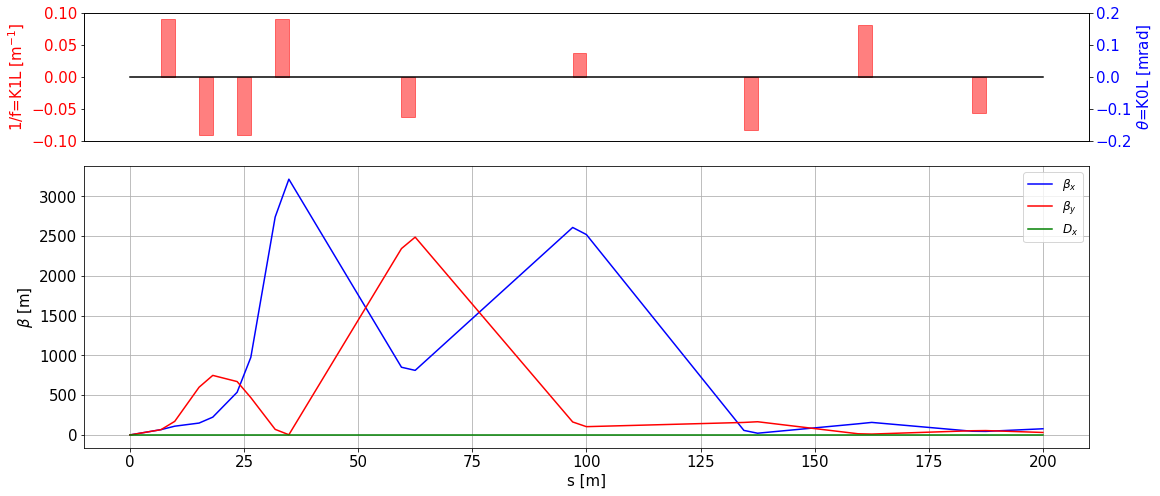

In [38]:
fig = plt.figure(figsize=(18,8))
fontsize=15

ax1=plt.subplot2grid((3,3), (0,0), colspan=3, rowspan=1)
plt.plot(myTwiss['s'],0*myTwiss['s'],'k')
DF=myTwiss[(myTwiss['keyword']=='quadrupole')]
#DF=myTwiss[(myTwiss['keyword']=='multipole')]
for i in range(len(DF)):
    aux=DF.iloc[i]
    plotLatticeSeries(plt.gca(),aux, height=aux.k1l, v_offset=aux.k1l/2, color='r')
color = 'red'
ax1.set_ylabel('1/f=K1L [m$^{-1}$]', color=color,fontsize=fontsize)  # we already handled the x-label with ax1
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', bottom=False,labelbottom=False)
ax1.tick_params(labelsize=fontsize)
plt.ylim(-.1,.1)
#plt.title('Our machine, 2016 Optics, Beam 1, IP5 squeeze, $\\beta_{IP}=$'+format(myTwiss[myTwiss['name'].str.contains('ip5')]['betx'].values[0],'2.2f')+' m, Q=('+format(madx.table.summ.Q1[0],'2.3f')+', '+ format(madx.table.summ.Q2[0],'2.3f')+'), $\\xi$=('+format(madx.table.summ.DQ1[0],'2.3f')+', '+ format(madx.table.summ.DQ2[0],'2.3f')+')')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'blue'
ax2.set_ylabel('$\\theta$=K0L [mrad]', color=color,fontsize=fontsize)  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor=color)
ax2.tick_params(labelsize=fontsize)
#DF=myTwiss[(myTwiss['keyword']=='sbend')]
DF=myTwiss[(myTwiss['keyword']=='multipole')]
for i in range(len(DF)):
    aux=DF.iloc[i]
    plotLatticeSeries(ax2,aux, height=aux.angle, v_offset=aux.angle/2, color='b')
    plotLatticeSeries(ax2,aux, height=aux.k0l, v_offset=aux.k0l/2, color='b')
plt.ylim(-.2,.2)

plt.subplot2grid((3,3), (1,0), colspan=3, rowspan=2,sharex=ax1)

plot(myTwiss.s,myTwiss.betx,'-b',label='$\\beta_x$')
plot(myTwiss.s,myTwiss.bety,'-r',label='$\\beta_y$')
plot(myTwiss.s,myTwiss.dx,'-g',label='$D_x$')
xlabel('s [m]',fontsize=fontsize)
ylabel('$\\beta$ [m]',fontsize=fontsize)
xticks(fontsize=fontsize)
yticks(fontsize=fontsize)
grid()
legend(fontsize=fontsize-3,loc='upper right')


In [39]:
# Get global strengths of matching quads
mad.input('value,k6m;')
mad.input('value,k7m;')
mad.input('value,k8m;')
mad.input('value,k9m;')
mad.input('value,k10m;')
k6m = mad.globals.k6m
k7m = mad.globals.k7m
k8m = mad.globals.k8m
k9m = mad.globals.k9m
k10m = mad.globals.k10m

k6m                =     -0.02076126615 ;
k7m                =      0.01232529284 ;
k8m                =     -0.02757578915 ;
k9m                =      0.02696722345 ;
k10m               =      -0.0190512555 ;


In [40]:
# Confirm that the optics at the exit are correct
print(myTwiss.betx[-1]-betxtargetright)
print(myTwiss.alfx[-1]-alfxtargetright)
print(myTwiss.bety[-1]-betytargetright)
print(myTwiss.alfy[-1]-alfytargetright)

7.407463442632434e-08
-4.380140028459323e-09
1.630756102599662e-06
5.118706591922262e-08


# Stiched straight section

In [41]:
# straight section left of the IP
seq3 = '''
        ss3: SEQUENCE, refer=centre, L=8*lcell;
        
        ! matching quads
        n = 0;
        QM11: qm1, at = lcell*n+lcell*0.25+lqm/2;
        QM12: qm2, at = lcell*n+lcell*0.75+lqm/2;
        
        ! matching quads
        n = 1; 
        QM13: qm3, at = lcell*n+lcell*0.25+lqm/2;
        
        n = 2; !empty
        QM14: qm4, at = lcell*n+lcell*0+lqm/2;
        QM15: qm5, at = lcell*n+lcell*0.75+lqm/2;
        
        ! Triplet
        n = 3;  
        QFT11: qft, at = lcell*n+16.66666666666;
        QDT11: qdt, at = lcell*n+25;
        QDT12: qdt, at = lcell*n+33.33333333333;
        QFT12: qft, at = lcell*n+41.66666666666;
        
        myMarker: marker, at = 4*lcell;
        
        
        ! Triplet
        n = 4;
        ! Antisymmetric
        !QDT22: qdt, at = lcell*n+lcell-41.66666666666;
        !QFT22: qft, at = lcell*n+lcell-33.33333333333;
        !QFT21: qft, at = lcell*n+lcell-25;
        !QDT21: qdt, at = lcell*n+lcell-16.66666666666;
        ! Symmetric
        QFT22: qft, at = lcell*n+lcell-41.66666666666;
        QDT22: qdt, at = lcell*n+lcell-33.33333333333;
        QDT21: qdt, at = lcell*n+lcell-25;
        QFT21: qft, at = lcell*n+lcell-16.66666666666;
        
        
        ! matching quads
        n = 5;
        QM16: qm6, at = lcell*n+lcell*(1-0.75)-lqm/2;
        QM17: qm7, at = lcell*n+lcell*(1-0)-lqm/2;
        
        n = 6; !empty
        QM18: qm8, at = lcell*n+lcell*(1-0.25)-lqm/2;
    
        ! Triplet
        n = 7;  
        QM19: qm9, at = lcell*n+lcell*(1-0.75)-lqm/2;
        QM110: qm10, at = lcell*n+lcell*(1-0.25)-lqm/2;
        
        endsequence;
'''

beam2 = '''
        beam, particle=proton, energy=20.0;
'''

In [42]:
madinput = f'''
        {seq3}
        {beam2}
        use, sequence=ss3;
        
'''
mad.input(madinput)

++++++ info: n redefined
++++++ warning: implicit element re-definition ignored: qm11
++++++ warning: implicit element re-definition ignored: qm12
++++++ info: n redefined
++++++ warning: implicit element re-definition ignored: qm13
++++++ info: n redefined
++++++ warning: implicit element re-definition ignored: qm14
++++++ warning: implicit element re-definition ignored: qm15
++++++ info: n redefined
++++++ warning: implicit element re-definition ignored: qft11
++++++ warning: implicit element re-definition ignored: qdt11
++++++ warning: implicit element re-definition ignored: qdt12
++++++ warning: implicit element re-definition ignored: qft12
++++++ warning: implicit element re-definition ignored: mymarker
++++++ info: n redefined
++++++ warning: implicit element re-definition ignored: qft22
++++++ warning: implicit element re-definition ignored: qdt22
++++++ warning: implicit element re-definition ignored: qdt21
++++++ warning: implicit element re-definition ignored: qft21
++++++ in

True

In [43]:
mad.input(f'''
!k10m = -0.02012455257;
!k9m = 0.02286888419;
!k8m = -0.01958231945;
!k7m = 0.01119300171;
!k6m = -0.02108338403;

k10m = {k10m};
k9m = {k9m};
k8m = {k8m};
k7m = {k7m};
k6m = {k6m};


k1m = {k1m};
k2m = {k2m};
k3m = {k3m};
k4m = {k4m};
k5m = {k5m};
''')

++++++ info: k10m redefined
++++++ info: k9m redefined
++++++ info: k8m redefined
++++++ info: k7m redefined
++++++ info: k6m redefined
++++++ info: k1m redefined
++++++ info: k2m redefined
++++++ info: k3m redefined
++++++ info: k4m redefined
++++++ info: k5m redefined


True

In [44]:
mad.input('SAVEBETA, LABEL=bini, PLACE=#s;')
mad.input(f'twiss, betx={betxtargetleft},bety={betytargetleft},alfx={alfxtargetleft},alfy={alfytargetleft};')

enter Twiss module
  
open line - error with deltap:   0.000000E+00
initial orbit vector:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00
final orbit vector:     0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

            length             orbit5               alfa            gammatr 
               400                 -0                  0                  0 

                q1                dq1            betxmax              dxmax 
       1.627274373                  0        2000.033465                  0 

             dxrms             xcomax             xcorms                 q2 
                 0                  0                  0        2.773892432 

               dq2            betymax              dymax              dyrms 
                 0        1999.946177                  0                  0 

            ycomax             ycorms             deltap            synch_1 


True

In [45]:
mad.input('twiss, beta0=bini;')
twtable=mad.table.twiss
myTwiss = twtable.dframe()

enter Twiss module
 Found 6 initial orbit vector values from twiss command. 
  
open line - error with deltap:   0.000000E+00
initial orbit vector:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00
final orbit vector:     0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

            length             orbit5               alfa            gammatr 
               400                 -0                  0                  0 

                q1                dq1            betxmax              dxmax 
       1.627274373                  0        2000.033465                  0 

             dxrms             xcomax             xcorms                 q2 
                 0                  0                  0        2.773892432 

               dq2            betymax              dymax              dyrms 
                 0        1999.946177                  0                  0 

            ycomax 

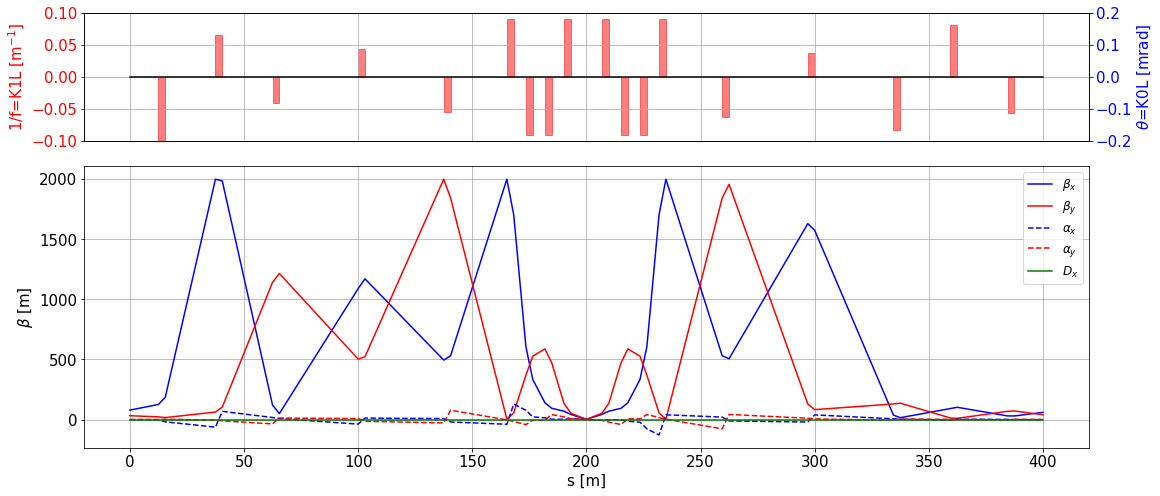

In [46]:
fig = plt.figure(figsize=(18,8))
fontsize=15

ax1=plt.subplot2grid((3,3), (0,0), colspan=3, rowspan=1)
plt.plot(myTwiss['s'],0*myTwiss['s'],'k')
DF=myTwiss[(myTwiss['keyword']=='quadrupole')]
#DF=myTwiss[(myTwiss['keyword']=='multipole')]
for i in range(len(DF)):
    aux=DF.iloc[i]
    plotLatticeSeries(plt.gca(),aux, height=aux.k1l, v_offset=aux.k1l/2, color='r')
color = 'red'
ax1.set_ylabel('1/f=K1L [m$^{-1}$]', color=color,fontsize=fontsize)  # we already handled the x-label with ax1
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', bottom=False,labelbottom=False)
ax1.tick_params(labelsize=fontsize)
plt.ylim(-.1,.1)
plt.grid(True)
#plt.title('Our machine, 2016 Optics, Beam 1, IP5 squeeze, $\\beta_{IP}=$'+format(myTwiss[myTwiss['name'].str.contains('ip5')]['betx'].values[0],'2.2f')+' m, Q=('+format(madx.table.summ.Q1[0],'2.3f')+', '+ format(madx.table.summ.Q2[0],'2.3f')+'), $\\xi$=('+format(madx.table.summ.DQ1[0],'2.3f')+', '+ format(madx.table.summ.DQ2[0],'2.3f')+')')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'blue'
ax2.set_ylabel('$\\theta$=K0L [mrad]', color=color,fontsize=fontsize)  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor=color)
ax2.tick_params(labelsize=fontsize)
#DF=myTwiss[(myTwiss['keyword']=='sbend')]
DF=myTwiss[(myTwiss['keyword']=='multipole')]
for i in range(len(DF)):
    aux=DF.iloc[i]
    plotLatticeSeries(ax2,aux, height=aux.angle, v_offset=aux.angle/2, color='b')
    plotLatticeSeries(ax2,aux, height=aux.k0l, v_offset=aux.k0l/2, color='b')
plt.ylim(-.2,.2)

plt.subplot2grid((3,3), (1,0), colspan=3, rowspan=2,sharex=ax1)

plot(myTwiss.s,myTwiss.betx,'-b',label='$\\beta_x$')
plot(myTwiss.s,myTwiss.bety,'-r',label='$\\beta_y$')
plot(myTwiss.s,myTwiss.alfx,'--b',label='$\\alpha_x$')
plot(myTwiss.s,myTwiss.alfy,'--r',label='$\\alpha_y$')
plot(myTwiss.s,myTwiss.dx,'-g',label='$D_x$')
xlabel('s [m]',fontsize=fontsize)
ylabel('$\\beta$ [m]',fontsize=fontsize)
xticks(fontsize=fontsize)
yticks(fontsize=fontsize)
grid()
#plt.ylim(-2,2)
#plt.ylim(30,80)
#plt.xlim(-4,4)
#plt.xlim(8*lcell-4,8*lcell+4)
legend(fontsize=fontsize-3,loc='upper right')


In [47]:
# Optics at the entrance of the cell (left of the IP)
print(myTwiss.betx[0])
print(myTwiss.alfx[0])
print(myTwiss.bety[0])
print(myTwiss.alfy[0])

78.36466208392963
-1.5983454030185102
31.895506879168607
0.6684426557485279


In [48]:
# Optics at the entrance of the cell (left of the IP)
print(myTwiss.betx[-1])
print(myTwiss.alfx[-1])
print(myTwiss.bety[-1])
print(myTwiss.alfy[-1])

59.76299544618912
-1.563456665788315
39.71046942617591
0.95206693345415


# Collider

In [49]:
# Main ring
seq = '''
        collider: SEQUENCE, refer=centre, L=c;
'''
for i in range(ncells):
    #if i in [ncells-6, ncells-4,ncells-3,ncells-2,ncells-1,0,1,2,3, 5, 
    #         ncells/2-6, ncells/2-4,ncells/2-3,ncells/2-2,ncells/2-1,ncells/2,ncells/2+1,ncells/2+2,ncells/2+3, ncells/2+5]:
    if i in [0, ncells/2]: # right of the IP
        seq +=f'''
                IP{i}: mymarker, at = lcell*{i};
                QFT{i}2: qft, at = lcell*{i}+lcell-41.66666666666;
                QDT{i}2: qdt, at = lcell*{i}+lcell-33.33333333333;
                QDT{i}1: qdt, at = lcell*{i}+lcell-25;
                QFT{i}1: qft, at = lcell*{i}+lcell-16.66666666666;
        '''
    elif i in [1, ncells/2+1]: # match cell nr. 1
        seq +=f'''
                QM{i}6: qm6, at = lcell*{i}+lcell*(1-0.75)-lqm/2;
                QM{i}7: qm7, at = lcell*{i}+lcell*(1-0) - lqm/2;
        '''
    elif i in [2, ncells/2+2]: # match cell nr. 2
        seq +=f'''QM{i}8: qm8, at = lcell*{i}+lcell*(1-0.25) - lqm/2;'''
    elif i in [3, ncells/2+3]: # match cell nr. 3
        seq +=f'''     
                QM{i}9: qm9, at = lcell*{i}+lcell*(1-0.75) - lqm/2;
                QM{i}10: qm10, at = lcell*{i}+lcell*(1-0.25)-lqm/2;
        '''
    elif i in [5, ncells/2+5]: # no dipoles
        seq += f'''
        qf{i}: qf, at = {i}*lcell+lq/2;
        xno{i}1: sext1, at = lcell*{i}+ lcell*0.1;
        qd{i}: qd, at = {i}*lcell+lcell*0.5+lq/2;
        xno{i}2: sext2, at = lcell*{i}+ lcell*0.6;
        \n'''
    elif i in [ncells-6, ncells/2-6]: # no dipoles
        seq += f'''
        qf{i}: qf, at = {i}*lcell+lq/2;
        xno{i}1: sext1, at = lcell*{i}+ lcell*0.1;
        qd{i}: qd, at = {i}*lcell+lcell*0.5+lq/2;
        xno{i}2: sext2, at = lcell*{i}+ lcell*0.6;
        \n'''
    elif i in [ncells-4, ncells/2-4]: # match cell nr. 3
        seq +=f'''
                QM{i}1: qm1, at = lcell*{i}+lcell*0.25+lqm/2;
                QM{i}2: qm2, at = lcell*{i}+lcell*0.75+lqm/2;
        ''' 
    elif i in [ncells-3, ncells/2-3]: # match cell nr. 2
        seq +=f'''
                QM{i}3: qm3, at = lcell*{i}+lcell*0.25+lqm/2;
        '''
    elif i in [ncells-2, ncells/2-2]: # match cell nr. 1
        seq +=f'''
                QM{i}4: qm4, at = lcell*{i}+lcell*0+lqm/2;
                QM{i}5: qm5, at = lcell*{i}+lcell*0.75+lqm/2;
        '''
    
    elif i in [ncells-1, ncells/2-1]: # left of the IP
        seq +=f'''
                QFT{i}1: qft, at = lcell*{i}+16.66666666666;
                QDT{i}1: qdt, at = lcell*{i}+25;
                QDT{i}2: qdt, at = lcell*{i}+33.33333333333;
                QFT{i}2: qft, at = lcell*{i}+41.66666666666;
        ''' 
    else:
        seq += f'''
        qf{i}: qf, at = lcell*{i}+lq;
        xno{i}1: sext1, at = lcell*{i}+ lcell*0.1;
        sb{i}1: DIPOL, at = lcell*{i} + lcell*0.2+ld/2;
        sb{i}2: DIPOL, at = lcell*{i} + lcell*0.35+ld/2;
        qd{i}: qd, at = lcell*{i}+lcell*0.5+lq/2;
        xno{i}2: sext2, at = lcell*{i}+ lcell*0.6;
        sb{i}3: DIPOL, at = lcell*{i} + lcell*0.65+ld/2;
        sb{i}4: DIPOL, at = lcell*{i} + lcell*0.8+ld/2;
        \n'''
seq += '''
        endsequence;
'''

beam = '''
        beam, particle=proton, energy=20.0;
'''

In [50]:
'''
k1 = {k1};
k2 = {k2};

k1q3 = 0.030303030;
k2q3 = -0.030303030;

!k10m = -0.02012455257;
!k9m = 0.02286888419;
!k8m = -0.01958231945;
!k7m = 0.01119300171;
!k6m = -0.02108338403;
k10m = -0.020000721;
k9m = 0.02273259172;
k8m = -0.02270564855;
k7m = 0.01058591628;
k6m = -0.02038114704;

k1m = -0.02012455257;
k2m = 0.02286888419;
k3m = -0.01958231945;
k4m = 0.01119300171;
k5m = -0.02108338403;
'''

'\nk1 = {k1};\nk2 = {k2};\n\nk1q3 = 0.030303030;\nk2q3 = -0.030303030;\n\n!k10m = -0.02012455257;\n!k9m = 0.02286888419;\n!k8m = -0.01958231945;\n!k7m = 0.01119300171;\n!k6m = -0.02108338403;\nk10m = -0.020000721;\nk9m = 0.02273259172;\nk8m = -0.02270564855;\nk7m = 0.01058591628;\nk6m = -0.02038114704;\n\nk1m = -0.02012455257;\nk2m = 0.02286888419;\nk3m = -0.01958231945;\nk4m = 0.01119300171;\nk5m = -0.02108338403;\n'

In [51]:
madinput = f'''
        {seq}
        {beam}
        angle = twopi/(4*ncells - 4*(4+1)*2*2);
        k1 = {k1};
        k2 = {k2};
        k1q3 = {k1q3};
        k2q3 = {k2q3};
        
        
        k1m = {k1m};
        k2m = {k2m};
        k3m = {k3m};
        k4m = {k4m};
        k5m = {k5m};
        k6m = {k6m};
        k7m = {k7m};
        k8m = {k8m};
        k9m = {k9m};
        k10m = {k10m};

        use, sequence=collider;
'''

In [52]:
mad.input(madinput)

++++++ warning: implicit element re-definition ignored: qm16
++++++ warning: implicit element re-definition ignored: qm17
++++++ warning: implicit element re-definition ignored: qf4
++++++ warning: implicit element re-definition ignored: xno41
++++++ warning: implicit element re-definition ignored: sb41
++++++ warning: implicit element re-definition ignored: sb42
++++++ warning: implicit element re-definition ignored: qd4
++++++ warning: implicit element re-definition ignored: xno42
++++++ warning: implicit element re-definition ignored: sb43
++++++ warning: implicit element re-definition ignored: sb44
++++++ warning: implicit element re-definition ignored: qf5
++++++ warning: implicit element re-definition ignored: xno51
++++++ warning: implicit element re-definition ignored: qd5
++++++ warning: implicit element re-definition ignored: xno52
++++++ warning: implicit element re-definition ignored: qf6
++++++ warning: implicit element re-definition ignored: xno61
++++++ warning: implicit

True

In [53]:
#mad.input('SAVEBETA, LABEL=bini, PLACE=#s;')
#mad.input(f'twiss, betx={0.7},bety={0.7},alfx={0.0},alfy={0.0};')
mad.input('twiss;')
twtable=mad.table.twiss
myTwiss = twtable.dframe()

enter Twiss module
  
iteration:   1 error:   0.000000E+00 deltap:   0.000000E+00
orbit:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

            length             orbit5               alfa            gammatr 
              2000                 -0      0.03761391795        5.156152023 

                q1                dq1            betxmax              dxmax 
       7.190601295        -81.2482954        2239.812322        20.01954763 

             dxrms             xcomax             xcorms                 q2 
       12.30136119                  0                  0        9.564918647 

               dq2            betymax              dymax              dyrms 
      -74.31376243        2061.090139                  0                  0 

            ycomax             ycorms             deltap            synch_1 
                 0                  0                  0                  0 

           synch_2            

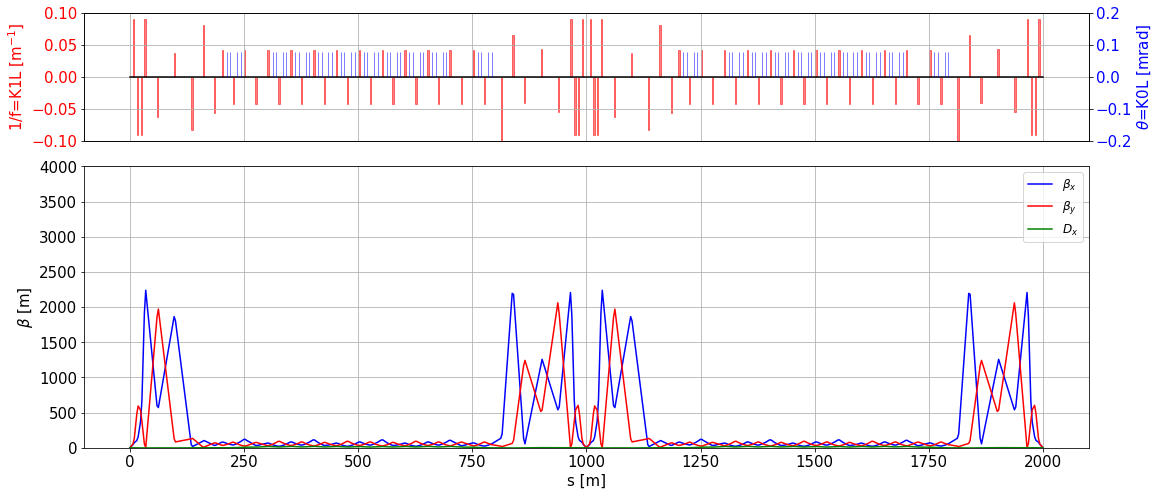

In [54]:
fig = plt.figure(figsize=(18,8))
fontsize=15

ax1=plt.subplot2grid((3,3), (0,0), colspan=3, rowspan=1)
plt.plot(myTwiss['s'],0*myTwiss['s'],'k')
DF=myTwiss[(myTwiss['keyword']=='quadrupole')]
#DF=myTwiss[(myTwiss['keyword']=='multipole')]
for i in range(len(DF)):
    aux=DF.iloc[i]
    plotLatticeSeries(plt.gca(),aux, height=aux.k1l, v_offset=aux.k1l/2, color='r')
color = 'red'
ax1.set_ylabel('1/f=K1L [m$^{-1}$]', color=color,fontsize=fontsize)  # we already handled the x-label with ax1
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', bottom=False,labelbottom=False)
ax1.tick_params(labelsize=fontsize)
plt.ylim(-.1,.1)
plt.grid(True)
#plt.title('Our machine, 2016 Optics, Beam 1, IP5 squeeze, $\\beta_{IP}=$'+format(myTwiss[myTwiss['name'].str.contains('ip5')]['betx'].values[0],'2.2f')+' m, Q=('+format(madx.table.summ.Q1[0],'2.3f')+', '+ format(madx.table.summ.Q2[0],'2.3f')+'), $\\xi$=('+format(madx.table.summ.DQ1[0],'2.3f')+', '+ format(madx.table.summ.DQ2[0],'2.3f')+')')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'blue'
ax2.set_ylabel('$\\theta$=K0L [mrad]', color=color,fontsize=fontsize)  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor=color)
ax2.tick_params(labelsize=fontsize)
DF=myTwiss[(myTwiss['keyword']=='multipole')]
if thick_dipoles:
    DF=myTwiss[(myTwiss['keyword']=='sbend')]
for i in range(len(DF)):
    aux=DF.iloc[i]
    plotLatticeSeries(ax2,aux, height=aux.angle, v_offset=aux.angle/2, color='b')
    plotLatticeSeries(ax2,aux, height=aux.k0l, v_offset=aux.k0l/2, color='b')
plt.ylim(-.2,.2)

plt.subplot2grid((3,3), (1,0), colspan=3, rowspan=2,sharex=ax1)

plot(myTwiss.s,myTwiss.betx,'-b',label='$\\beta_x$')
plot(myTwiss.s,myTwiss.bety,'-r',label='$\\beta_y$')
plot(myTwiss.s,myTwiss.dx,'-g',label='$D_x$')
xlabel('s [m]',fontsize=fontsize)
ylabel('$\\beta$ [m]',fontsize=fontsize)
xticks(fontsize=fontsize)
yticks(fontsize=fontsize)
grid()
plt.ylim(0,4000)
legend(fontsize=fontsize-3,loc='upper right')

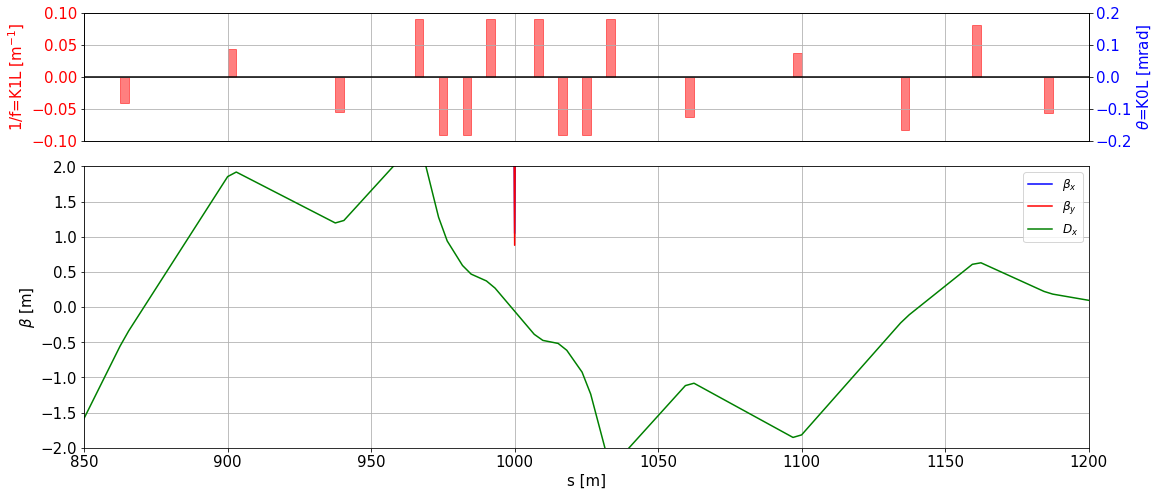

In [55]:
fig.gca().set_xlim(17*lcell,24*lcell)
fig.gca().set_ylim(-2,2)
display(fig)

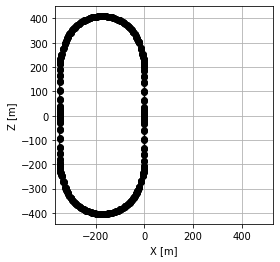

In [56]:
mad.input('survey;')
survtable = mad.table.survey
plt.plot(survtable['x'],survtable['z'],'o-k')
plt.axis('square');
plt.xlabel('X [m]')
plt.ylabel('Z [m]')
plt.grid()

# Chromaticity correction

In [57]:
mad.input('''
match_chroma: macro={
    MATCH, Sequence=collider;
        VARY, NAME = ks1, STEP = 1e-3;
        VARY, NAME = ks2, STEP = 1e-3;
        GLOBAL, dQ1 = 0.0;
        GLOBAL, dQ2 = 0.0;
        JACOBIAN,CALLS=1000,TOLERANCE=1.0E-18,STRATEGY=3;
    ENDMATCH;
}
''')
mad.input('use, sequence=collider; exec, match_chroma;')

START MATCHING

number of sequences: 1
sequence name: collider
number of variables:    2
user given constraints: 1
total constraints:      2

START JACOBIAN:

 JACOBIAN Strategy =           3
Initial Penalty Function =   0.1212382079280147E+05


 Solve system with            2 con,           2 var
 Rank             2   Condition number    2.7961246309992047     
 Step length    1.0000000000000000     
call:     2 Dx =   0.10000000E+01  Penalty function =  0.4056149724725817E-16
 Solve system with            2 con,           2 var
 Rank             2   Condition number    2.7961246307076846     
 Step length    5.3253608359687707E-011
call:     3 Dx =   0.53253608E-10  Penalty function =  0.4800860705047036E-23
 ++++++++++ JACOBIAN ended: converged successfully
 Final difference norm:  0.31831941939459846     

MATCH SUMMARY

Node_Name                  Constraint   Type  Target Value       Final Value        Penalty
-----------------------------------------------------------------------

True

In [58]:
mad.input('twiss;')
twtable=mad.table.twiss
myTwiss = twtable.dframe()

enter Twiss module
  
iteration:   1 error:   0.000000E+00 deltap:   0.000000E+00
orbit:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

            length             orbit5               alfa            gammatr 
              2000                 -0      0.03761391795        5.156152023 

                q1                dq1            betxmax              dxmax 
       7.190601295    2.189128988e-12        2239.812322        20.01954763 

             dxrms             xcomax             xcorms                 q2 
       12.30136119                  0                  0        9.564918647 

               dq2            betymax              dymax              dyrms 
  -9.260118932e-14        2061.090139                  0                  0 

            ycomax             ycorms             deltap            synch_1 
                 0                  0                  0                  0 

           synch_2            

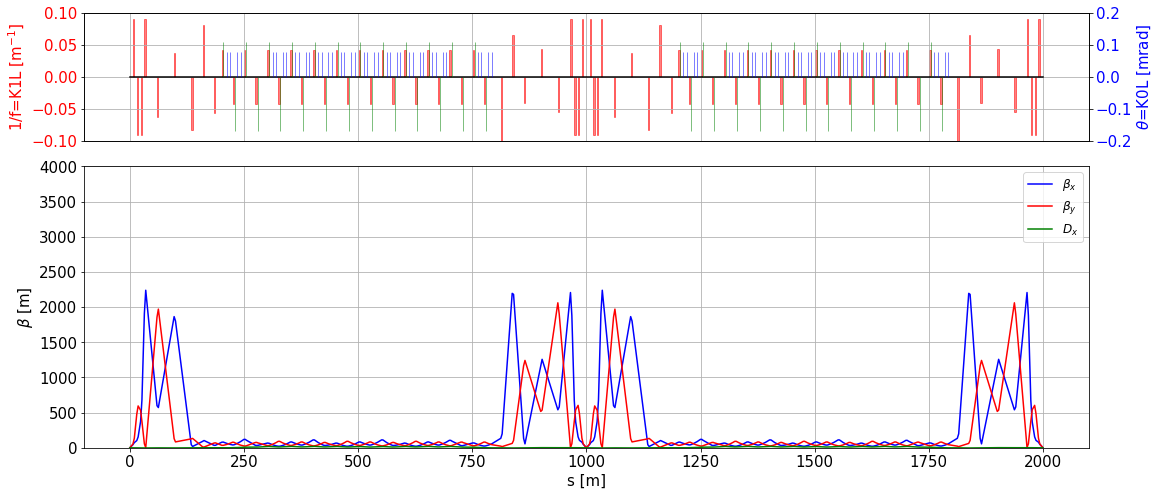

In [59]:
fig = plt.figure(figsize=(18,8))
fontsize=15

ax1=plt.subplot2grid((3,3), (0,0), colspan=3, rowspan=1)
plt.plot(myTwiss['s'],0*myTwiss['s'],'k')
DF=myTwiss[(myTwiss['keyword']=='quadrupole')]
#DF=myTwiss[(myTwiss['keyword']=='multipole')]
for i in range(len(DF)):
    aux=DF.iloc[i]
    plotLatticeSeries(plt.gca(),aux, height=aux.k1l, v_offset=aux.k1l/2, color='r')
color = 'red'
ax1.set_ylabel('1/f=K1L [m$^{-1}$]', color=color,fontsize=fontsize)  # we already handled the x-label with ax1
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', bottom=False,labelbottom=False)
ax1.tick_params(labelsize=fontsize)
plt.ylim(-.1,.1)
plt.grid(True)
#plt.title('Our machine, 2016 Optics, Beam 1, IP5 squeeze, $\\beta_{IP}=$'+format(myTwiss[myTwiss['name'].str.contains('ip5')]['betx'].values[0],'2.2f')+' m, Q=('+format(madx.table.summ.Q1[0],'2.3f')+', '+ format(madx.table.summ.Q2[0],'2.3f')+'), $\\xi$=('+format(madx.table.summ.DQ1[0],'2.3f')+', '+ format(madx.table.summ.DQ2[0],'2.3f')+')')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'blue'
ax2.set_ylabel('$\\theta$=K0L [mrad]', color=color,fontsize=fontsize)  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor=color)
ax2.tick_params(labelsize=fontsize)
DF=myTwiss[(myTwiss['keyword']=='multipole')]
if thick_dipoles:
    DF=myTwiss[(myTwiss['keyword']=='sbend')]
for i in range(len(DF)):
    aux=DF.iloc[i]
    plotLatticeSeries(ax2,aux, height=aux.angle, v_offset=aux.angle/2, color='b')
    plotLatticeSeries(ax2,aux, height=aux.k0l, v_offset=aux.k0l/2, color='b')
    plotLatticeSeries(ax2,aux, height=aux.k2l*2, v_offset=aux.k2l/2*2, color='g')
plt.ylim(-.2,.2)

plt.subplot2grid((3,3), (1,0), colspan=3, rowspan=2,sharex=ax1)

plot(myTwiss.s,myTwiss.betx,'-b',label='$\\beta_x$')
plot(myTwiss.s,myTwiss.bety,'-r',label='$\\beta_y$')
plot(myTwiss.s,myTwiss.dx,'-g',label='$D_x$')
xlabel('s [m]',fontsize=fontsize)
ylabel('$\\beta$ [m]',fontsize=fontsize)
xticks(fontsize=fontsize)
yticks(fontsize=fontsize)
grid()
plt.ylim(0,4000)
legend(fontsize=fontsize-3,loc='upper right')